In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_excel("User_record.xlsx", engine="openpyxl")


### Gender & Age Distribution

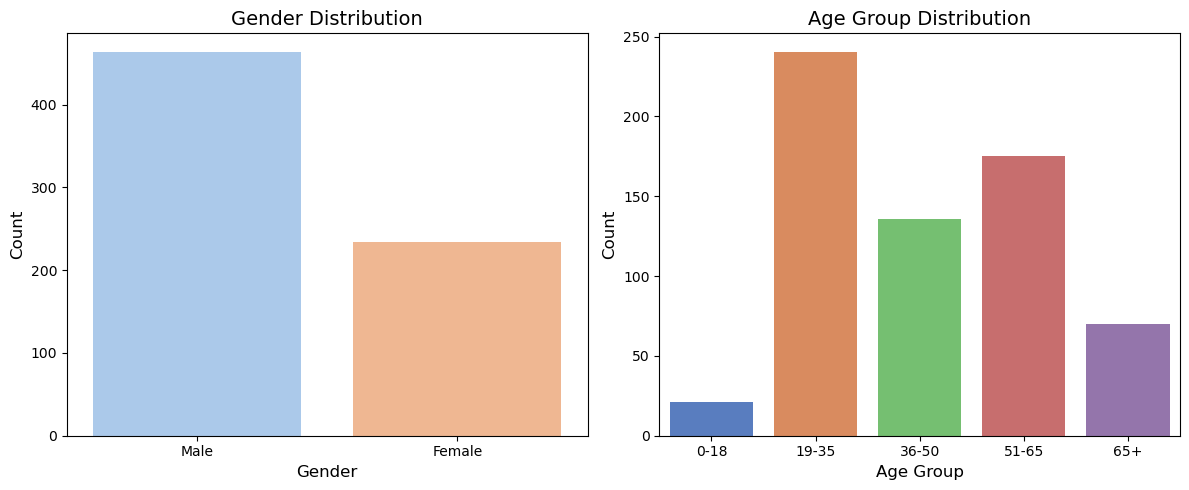

In [274]:

gender_counts = data['Gender'].value_counts()
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['0-18', '19-35', '36-50', '51-65', '65+']
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)
age_group_counts = data['Age Group'].value_counts()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(1, 2, 2)
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="muted")
plt.title('Age Group Distribution', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


### Income vs. Stress Level


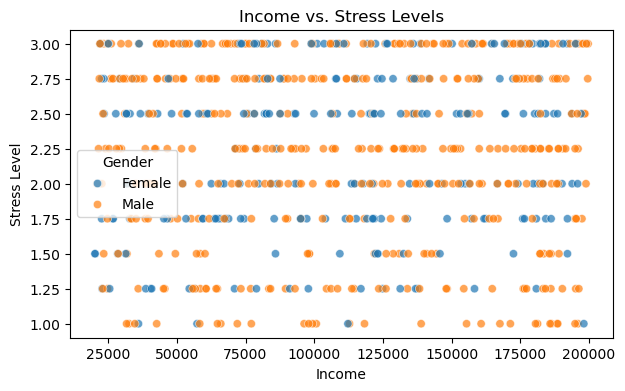

In [275]:
plt.figure(figsize=(7, 4))
sns.scatterplot(x='Income', y='Stress ', data=data, hue='Gender', alpha=0.7)
plt.title('Income vs. Stress Levels')
plt.xlabel('Income')
plt.ylabel('Stress Level')
plt.show()


### Heatmap of disease prevalence

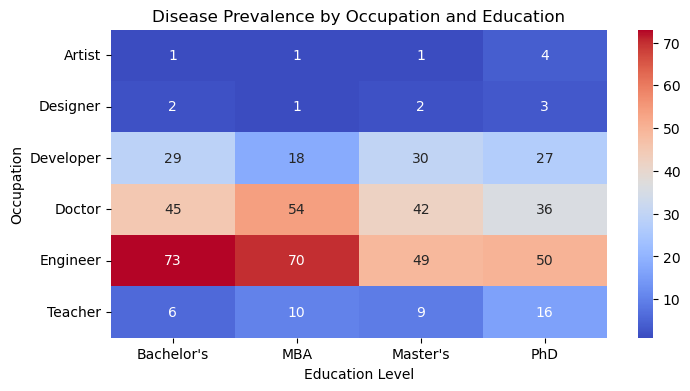

In [276]:
disease_occupation = data.pivot_table(index='Occupation', columns='Education ', values='Disease', aggfunc='count', fill_value=0)

plt.figure(figsize=(8, 4))
sns.heatmap(disease_occupation, annot=True, fmt='d', cmap='coolwarm')
plt.title('Disease Prevalence by Occupation and Education')
plt.xlabel('Education Level')
plt.ylabel('Occupation')
plt.show()


### 'Marital' status and calculate the sum of 'Savings' for each category


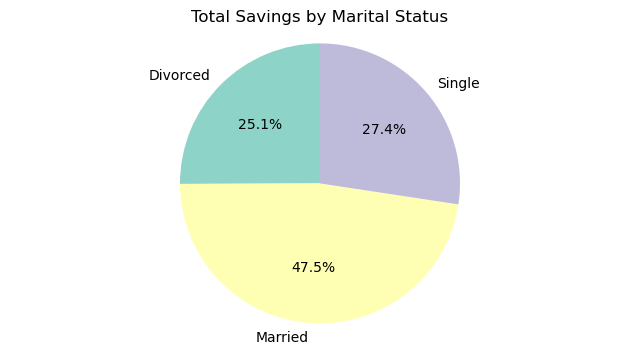

In [277]:

savings_by_marital = data.groupby('Marital ').agg({'Savings': 'sum'}).reset_index()
plt.figure(figsize=(8, 4))
plt.pie(savings_by_marital['Savings'], labels=savings_by_marital['Marital '], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(savings_by_marital)))
plt.title('Total Savings by Marital Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()


## What was the average Salary of each Occppation?

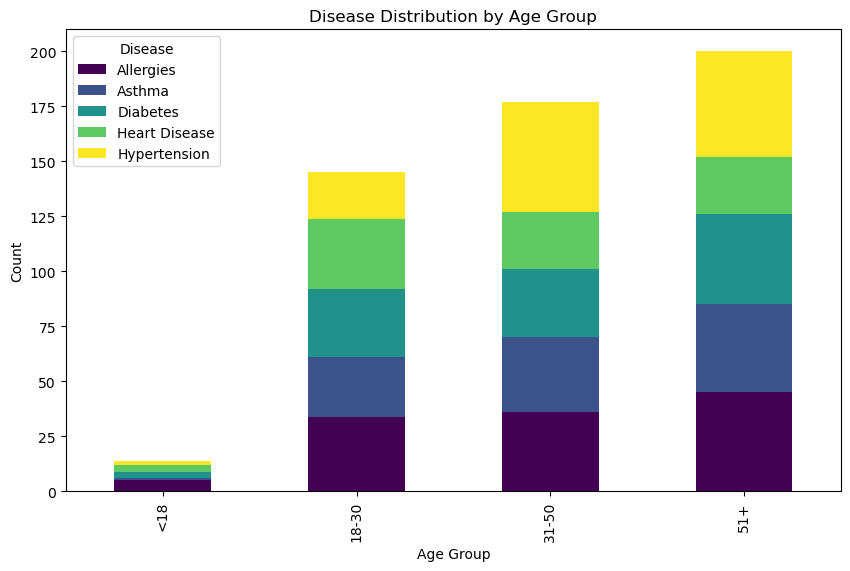

In [280]:
# Add age bins
bins = [0, 18, 30, 50, 100]
labels = ["<18", "18-30", "31-50", "51+"]
data["Age Group"] = pd.cut(data["Age"], bins=bins, labels=labels)

# Group by Age Group and Disease
age_disease_distribution = data.groupby("Age Group")["Disease"].value_counts().unstack()

# Plot disease distribution across age groups
age_disease_distribution.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Disease Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Disease")
plt.show()


## Violin Plot (Savings Distribution by Occupation)
See savings distribution for different occupations.

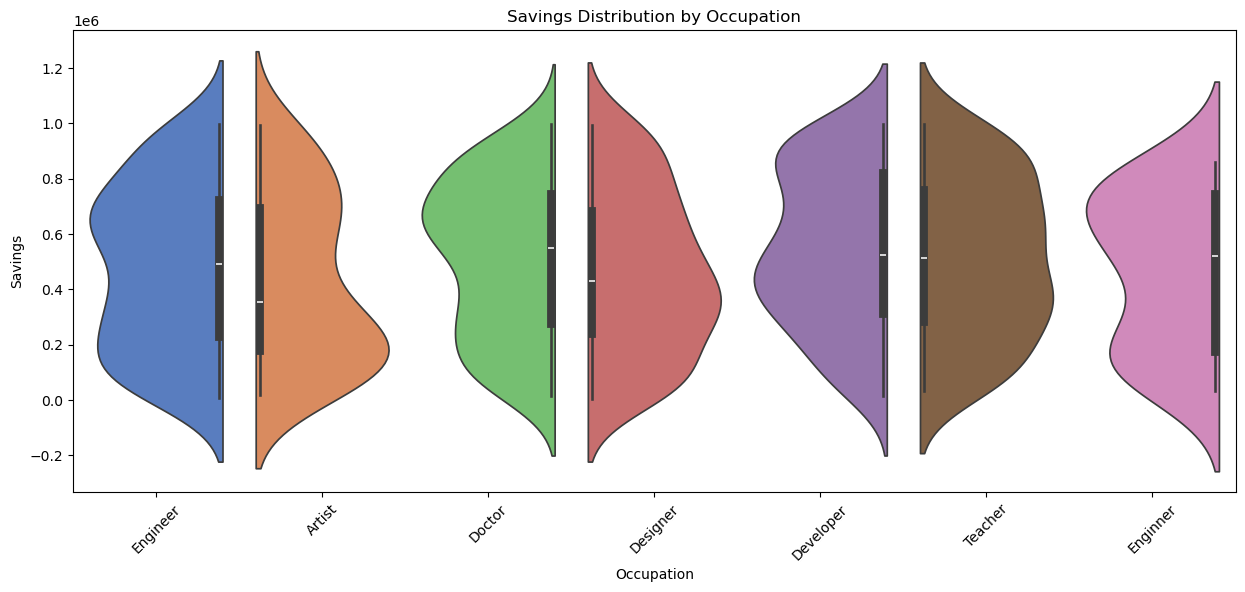

In [279]:
plt.figure(figsize=(15, 6))
sns.violinplot(x="Occupation", y="Savings", data=df,split=True, palette="muted")
plt.title("Savings Distribution by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Savings")
plt.xticks(rotation=45)
plt.show()


### Savings Potential by Sleep Patterns and Stress Levels

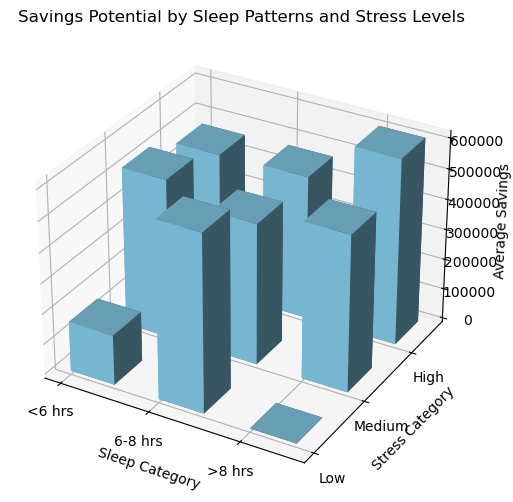

In [283]:
 # Categorize sleep patterns
def categorize_sleep(sleep_hours):
    if sleep_hours < 6:
        return "<6 hrs"
    elif 6 <= sleep_hours <= 8:
        return "6-8 hrs"
    else:
        return ">8 hrs"

data['Sleep Category'] = data['Sleeping '].apply(categorize_sleep)

# Categorize stress levels
def categorize_stress(stress):
    if stress <= 1.75:
        return "Low"
    elif 1.76 <= stress <= 2.75:
        return "Medium"
    else:
        return "High"

data['Stress Category'] = data['Stress '].apply(categorize_stress)

# Group by sleep and stress categories
savings_data = data.groupby(['Sleep Category', 'Stress Category']).agg({'Savings': 'mean'}).reset_index()

# Prepare data for 3D plotting
sleep_categories = ["<6 hrs", "6-8 hrs", ">8 hrs"]
stress_categories = ["Low", "Medium", "High"]
savings_matrix = np.zeros((len(sleep_categories), len(stress_categories)))

for i, sleep_cat in enumerate(sleep_categories):
    for j, stress_cat in enumerate(stress_categories):
        value = savings_data[(savings_data['Sleep Category'] == sleep_cat) &
                             (savings_data['Stress Category'] == stress_cat)]['Savings']
        savings_matrix[i, j] = value if not value.empty else 0

# Plotting the 3D bar chart
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

_x = np.arange(len(sleep_categories))
_y = np.arange(len(stress_categories))
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

z = np.zeros_like(x)
dz = savings_matrix.ravel()

ax.bar3d(x, y, z, dx=0.5, dy=0.5, dz=dz, shade=True, color='skyblue')

# Add labels and titles
ax.set_xticks(np.arange(len(sleep_categories)))
ax.set_xticklabels(sleep_categories)
ax.set_yticks(np.arange(len(stress_categories)))
ax.set_yticklabels(stress_categories)
ax.set_xlabel('Sleep Category')
ax.set_ylabel('Stress Category')
ax.set_zlabel('Average Savings')
ax.set_title('Savings Potential by Sleep Patterns and Stress Levels')

plt.show()